In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report,accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_excel("heart_disease.xlsx",sheet_name='Heart_disease')
df.to_csv("heart_disease.csv",index=False)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [4]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [5]:
df['oldpeak']=df['oldpeak'].fillna(df['oldpeak'].median())

In [6]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
765,58,Male,non-anginal,150,219,False,st-t abnormality,118,True,0.0,downsloping,normal,2


In [7]:
df=df.drop_duplicates()

In [8]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


In [9]:
le=LabelEncoder()

for col in ['sex','cp','fbs','restecg','exang','slope','thal']:
  df[col]=df[col].astype(str)
  df[col]=le.fit_transform(df[col])


In [10]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,1,2.3,0,0,0
1,41,1,1,135,203,0,1,132,1,0.0,1,0,0
2,57,1,0,140,192,0,1,148,1,0.4,1,0,0
3,52,1,3,118,186,0,0,190,1,0.0,1,0,0
4,57,1,0,110,201,0,1,126,3,1.5,1,0,0


In [11]:
x=df.drop(columns=['sex'])
y=df.iloc[:,1]


In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [13]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

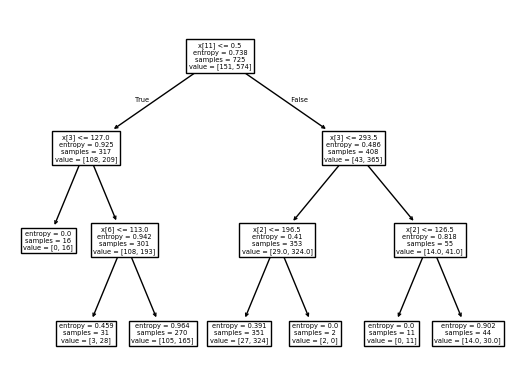

In [14]:
tree.plot_tree(model)
plt.show()

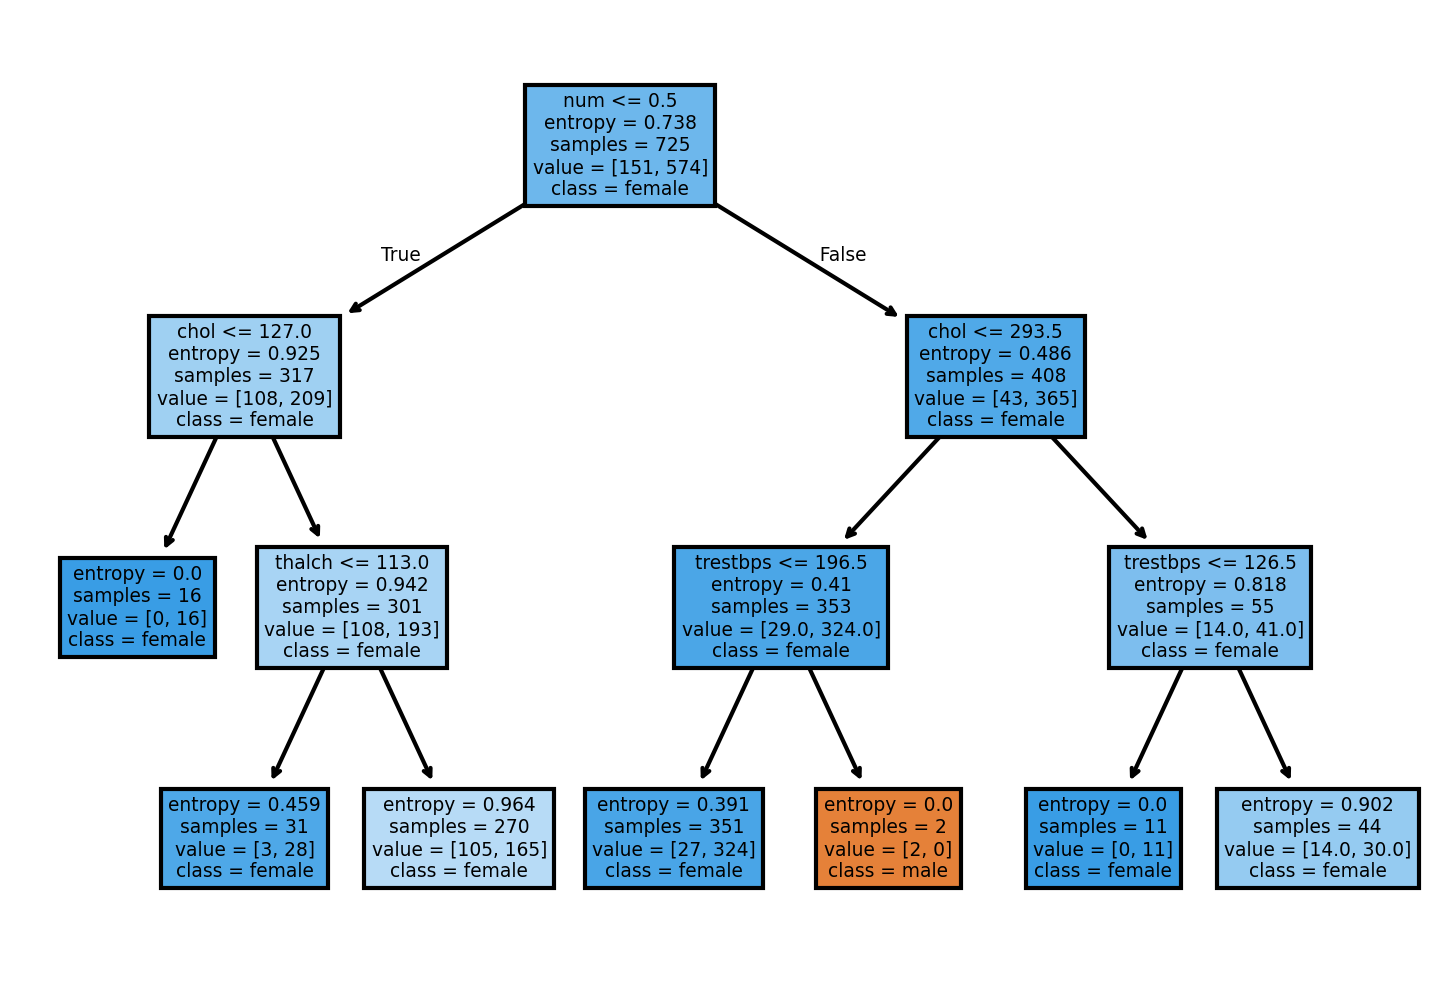

In [15]:
fn=['age','cp','trestbps','chol','fbs','restecg','thalch','exang','oldpeak','slope','thal','num']
cn=['male','female']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [16]:
preds=model.predict(x_test)
pd.Series(preds).value_counts()

,count
1,180
0,2


In [17]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        39
           1       0.78      0.99      0.87       143

    accuracy                           0.77       182
   macro avg       0.39      0.49      0.44       182
weighted avg       0.62      0.77      0.69       182



In [18]:
accuracy_score(y_test,preds)

0.7747252747252747

In [19]:
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=3)
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [20]:
preds_gini=model_gini.predict(x_test)
pd.Series(preds_gini).value_counts()

,count
1,180
0,2


In [21]:
accuracy_score(y_test,preds_gini)

0.7747252747252747

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize Decision Tree
dtree = DecisionTreeClassifier(random_state=42)

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate on test set
best_tree = grid_search.best_estimator_
y_pred = best_tree.predict(x_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Best Hyperparameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Test Accuracy: 0.7802197802197802
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        39
           1       0.78      0.99      0.88       143

    accuracy                           0.78       182
   macro avg       0.39      0.50      0.44       182
weighted avg       0.62      0.78      0.69       182



In [ ]:
1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
A.   “Some common hyperparameters in decision tree models include:

max_depth :-Limits the depth of the tree. A shallow tree may underfit, while a very deep tree can overfit the data.

min_samples_split :- Minimum number of samples required to split a node. Increasing this prevents splits on small data subsets, reducing overfitting.

min_samples_leaf :- Minimum samples required at a leaf node. Larger values produce smoother trees and reduce overfitting.

criterion :- The function used to measure split quality, typically gini or entropy. It determines how the algorithm selects splits.

max_features :- Number of features considered for splitting. Limiting features can introduce randomness and reduce overfitting.

max_leaf_nodes :- Limits the number of leaf nodes to control tree complexity.

min_impurity_decrease :- Minimum impurity reduction required to split a node. Higher values produce simpler trees.

Effect on performance:

These hyperparameters control the complexity of the tree and balance between underfitting and overfitting. Proper tuning ensures the model generalizes well on unseen data.”

In [ ]:
2.What is the difference between the Label encoding and One-hot encoding?
A.Label Encoding converts categorical values into numeric labels (0, 1, 2, …). It’s simple and uses one column, but it can introduce an ordinal relationship between categories, which may mislead some algorithms. It’s best for ordinal variables like Low, Medium, High.

One-Hot Encoding converts categorical values into binary columns, one per category. Each row has a 1 in the column corresponding to its category and 0 elsewhere. It avoids ordinal assumptions, making it suitable for nominal variables like color or country, but it can increase dimensionality.

Key Point: Label Encoding implies order, One-Hot Encoding does not.”